<a href="https://colab.research.google.com/github/kaburov38/batik_pekalongan/blob/main/resnet18_4_kelas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import glob
import PIL

In [ ]:
Motif_liong = glob.glob('/content/drive/MyDrive/PEKALONGAN/train/Liong/*')
Motif_jlamprang = glob.glob('/content/drive/MyDrive/PEKALONGAN/train/Jlamprang/*')
Motif_terangBulan = glob.glob('/content/drive/MyDrive/PEKALONGAN/train/Terang Bulan/*')
Motif_tujuhRupa = glob.glob('/content/drive/MyDrive/PEKALONGAN/train/Tujuh Rupa/*')
test_liong = glob.glob('/content/drive/MyDrive/PEKALONGAN/test/Liong/*')
test_jlamprang = glob.glob('/content/drive/MyDrive/PEKALONGAN/test/Jlamprang/*')
test_terangBulan = glob.glob('/content/drive/MyDrive/PEKALONGAN/test/Terang Bulan/*')
test_tujuhRupa = glob.glob('/content/drive/MyDrive/PEKALONGAN/test/Tujuh Rupa/*')

In [ ]:
len(Motif_liong)

501

In [ ]:
liong = 0
jlamprang = 0
terangbulan = 0
tujuhrupa = 0

In [ ]:
X_train = []
Y_train = []
X_test = []
Y_test = []
#class 1
for i in range(480):
  if len(PIL.Image.open(str(Motif_liong[i])).getbands()) == 3:
    X_train.append(np.asarray(PIL.Image.open(str(Motif_liong[i]))))
    Y_train.append([1])
    liong+=1
for i in range(480,500):
  if len(PIL.Image.open(str(Motif_liong[i])).getbands()) == 3:
    X_test.append(np.asarray(PIL.Image.open(str(Motif_liong[i]))))
    Y_test.append([1])
    liong+=1
for i in range(len(test_liong)):
  X_test.append(np.asarray(PIL.Image.open(str(test_liong[i]))))
  Y_test.append([1])

#class 2
for i in range(480):
  if len(PIL.Image.open(str(Motif_jlamprang[i])).getbands()) == 3:
    X_train.append(np.asarray(PIL.Image.open(str(Motif_jlamprang[i]))))
    Y_train.append([2])
    jlamprang+=1
for i in range(480,500):
  if len(PIL.Image.open(str(Motif_jlamprang[i])).getbands()) == 3:
    X_test.append(np.asarray(PIL.Image.open(str(Motif_jlamprang[i]))))
    Y_test.append([2])
    jlamprang+=1
for i in range(len(test_jlamprang)):
  X_test.append(np.asarray(PIL.Image.open(str(test_jlamprang[i]))))
  Y_test.append([2])

#class 3
for i in range(480):
  if len(PIL.Image.open(str(Motif_terangBulan[i])).getbands()) == 3:
    X_train.append(np.asarray(PIL.Image.open(str(Motif_terangBulan[i]))))
    Y_train.append([3])
    terangbulan+=1
for i in range(480,500):
  if len(PIL.Image.open(str(Motif_terangBulan[i])).getbands()) == 3:
    X_test.append(np.asarray(PIL.Image.open(str(Motif_terangBulan[i]))))
    Y_test.append([3])
    terangbulan+=1
for i in range(len(test_terangBulan)):
  X_test.append(np.asarray(PIL.Image.open(str(test_terangBulan[i]))))
  Y_test.append([3])

#class 4
for i in range(483):
  if len(PIL.Image.open(str(Motif_tujuhRupa[i])).getbands()) == 3:
    X_train.append(np.asarray(PIL.Image.open(str(Motif_tujuhRupa[i]))))
    Y_train.append([4])
    tujuhrupa+=1
for i in range(483,503):
  if len(PIL.Image.open(str(Motif_tujuhRupa[i])).getbands()) == 3:
    X_test.append(np.asarray(PIL.Image.open(str(Motif_tujuhRupa[i]))))
    Y_test.append([4])
    tujuhrupa+=1
for i in range(len(test_tujuhRupa)):
  X_test.append(np.asarray(PIL.Image.open(str(test_tujuhRupa[i]))))
  Y_test.append([4])

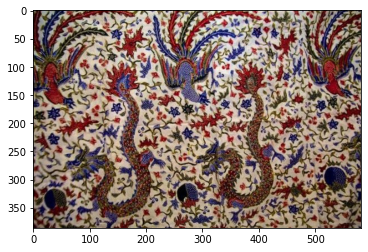

In [ ]:
# Drawing sample . 
plt.imshow(X_train[0])

In [ ]:
import PIL.ImageOps

In [ ]:
for i in range(len(X_train)):
  X_train[i] = np.asarray(PIL.ImageOps.fit(PIL.Image.fromarray(np.uint8(X_train[i])), size=(250,250)))
for i in range(len(X_test)):
  X_test[i] = np.asarray(PIL.ImageOps.fit(PIL.Image.fromarray(np.uint8(X_test[i])), size=(250,250)))

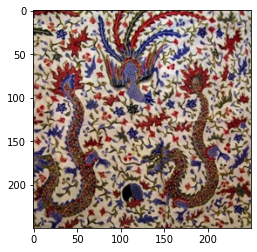

In [ ]:
# Drawing sample . 
plt.imshow(X_train[0])

In [ ]:
Y_train[0]

[1]

In [ ]:
X_flip_train = []
Y_flip_train = []
X_flip_test = []
Y_flip_test = []

for i in range(len(X_train)):
  X_flip_train.append(X_train[i])
  Y_flip_train.append(Y_train[i])
  X_flip_train.append(np.asarray(PIL.ImageOps.mirror(PIL.Image.fromarray(np.uint8(X_train[i])))))
  Y_flip_train.append(Y_train[i])
for i in range(len(X_test)):
  X_flip_test.append(X_test[i])
  Y_flip_test.append(Y_test[i])
  X_flip_test.append(np.asarray(PIL.ImageOps.mirror(PIL.Image.fromarray(np.uint8(X_test[i])))))
  Y_flip_test.append(Y_test[i])

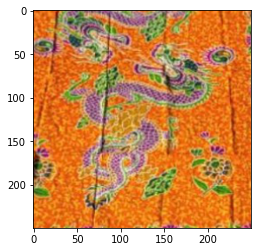

In [ ]:
plt.imshow(X_flip_train[91])

In [ ]:
Y_flip_train[1]

[1]

In [ ]:
# Normalize the data.
X_train = np.array(X_train, dtype='float32')
X_test = np.array(X_test, dtype='float32')
X_flip_train = np.array(X_flip_train, dtype='float32')
X_flip_test = np.array(X_flip_test, dtype='float32')
X_train /= 255.0
X_test /= 255.0
X_flip_train /= 255.0
X_flip_test /= 255.0

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2,shuffle = True)
X_flip_train, X_flip_val, Y_flip_train, Y_flip_val = train_test_split(X_flip_train, Y_flip_train, test_size=0.2, shuffle=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(Y_train)
Y_train = encoder.transform(Y_train).toarray()
Y_test = encoder.transform(Y_test).toarray()
Y_flip_train = encoder.transform(Y_flip_train).toarray()
Y_flip_test = encoder.transform(Y_flip_test).toarray()
Y_val =  encoder.transform(Y_val).toarray()
Y_flip_val = encoder.transform(Y_flip_val).toarray()

In [ ]:
"""
ResNet-18
Reference:
[1] K. He et al. Deep Residual Learning for Image Recognition. CVPR, 2016
[2] K. He, X. Zhang, S. Ren, and J. Sun. Delving deep into rectifiers:
Surpassing human-level performance on imagenet classification. In
ICCV, 2015.
"""


from keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv2D,  MaxPool2D, Flatten, GlobalAveragePooling2D,  BatchNormalization, Add, Activation, Input, MaxPooling2D, ZeroPadding2D, AveragePooling2D, Dropout
from keras.models import Sequential
from keras.models import Model
import tensorflow as tf
from keras import layers, activations 
from keras.regularizers import l2


class ResnetBlock(Model):
    """
    A standard resnet block.
    """

    def __init__(self, channels: int, down_sample=False):
        """
        channels: same as number of convolution kernels
        """
        super().__init__()

        self.__channels = channels
        self.__down_sample = down_sample
        self.__strides = [2, 1] if down_sample else [1, 1]

        KERNEL_SIZE = (3, 3)
        # use He initialization, instead of Xavier (a.k.a 'glorot_uniform' in Keras), as suggested in [2]
        INIT_SCHEME = "he_normal"

        self.conv_1 = Conv2D(self.__channels, strides=self.__strides[0],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_1 = BatchNormalization()
        self.conv_2 = Conv2D(self.__channels, strides=self.__strides[1],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_2 = BatchNormalization()
        self.merge = Add()

        if self.__down_sample:
            # perform down sampling using stride of 2, according to [1].
            self.res_conv = Conv2D(
                self.__channels, strides=2, kernel_size=(1, 1), kernel_initializer=INIT_SCHEME, padding="same")
            self.res_bn = BatchNormalization()

    def call(self, inputs):
        res = inputs

        x = self.conv_1(inputs)
        x = self.bn_1(x)
        x = tf.nn.relu(x)
        x = self.conv_2(x)
        x = self.bn_2(x)

        if self.__down_sample:
            res = self.res_conv(res)
            res = self.res_bn(res)

        # if not perform down sample, then add a shortcut directly
        x = self.merge([x, res])
        out = tf.nn.relu(x)
        return out


class ResNet18(Model):

    def __init__(self, num_classes, **kwargs):
        """
            num_classes: number of classes in specific classification task.
        """
        super().__init__(**kwargs)
        self.conv_1 = Conv2D(64, (7, 7), strides=2,
                             padding="same", kernel_initializer="he_normal")
        self.init_bn = BatchNormalization()
        self.pool_2 = MaxPool2D(pool_size=(2, 2), strides=2, padding="same")
        self.res_1_1 = ResnetBlock(64)
        self.res_1_2 = ResnetBlock(64)
        self.res_2_1 = ResnetBlock(128, down_sample=True)
        self.res_2_2 = ResnetBlock(128)
        self.res_3_1 = ResnetBlock(256, down_sample=True)
        self.res_3_2 = ResnetBlock(256)
        self.res_4_1 = ResnetBlock(512, down_sample=True)
        self.res_4_2 = ResnetBlock(512)
        self.dropout = Dropout(0.5)
        self.avg_pool = GlobalAveragePooling2D()
        self.flat = Flatten()
        self.fc = Dense(num_classes, activation="softmax")

    def call(self, inputs):
        out = self.conv_1(inputs)
        out = self.init_bn(out)
        out = tf.nn.relu(out)
        out = self.pool_2(out)
        for res_block in [self.res_1_1, self.res_1_2, self.res_2_1, self.res_2_2, self.res_3_1, self.res_3_2, self.res_4_1, self.res_4_2]:
            out = res_block(out)
        out = self.dropout(out)
        out = self.avg_pool(out)
        out = self.flat(out)
        out = self.fc(out)
        return out

In [ ]:
# model = ResNet18(4)
# model.build(input_shape = (None,250,250,3))
# #use categorical_crossentropy since the label is one-hot encoded
# #from keras.optimizers import SGD
# #opt = SGD(learning_rate=0.1,momentum=0.9,decay = 1e-04) #parameters suggested by He [1]
# #tf.keras.optimizers.SGD()
# model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=["accuracy"]) 
# model.summary()

Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "res_net18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  9472      
                                                                 
 batch_normalization (BatchN  multiple                 256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
 resnet_block (ResnetBlock)  multiple          

In [ ]:
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#   # Restrict TensorFlow to only use the first GPU
#   try:
#     tf.config.set_visible_devices(gpus[0], 'GPU')
#     logical_gpus = tf.config.list_logical_devices('GPU')
#     print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
#   except RuntimeError as e:
#     # Visible devices must be set before GPUs have been initialized
#     print(e)

1 Physical GPUs, 1 Logical GPU


In [ ]:
# from keras.callbacks import EarlyStopping

# es = EarlyStopping(patience= 6, restore_best_weights=True, monitor="val_accuracy")
# #I did not use cross validation, so the validate performance is not accurate.
# STEPS = len(X_train) / 16
# history = model.fit(X_train, Y_train, batch_size = 16, steps_per_epoch=np.float32(STEPS), epochs=50, validation_data=(X_val, Y_val), callbacks=[es])

Epoch 1/50
96/96 [==============================] - 20s 86ms/step - loss: 1.3828 - accuracy: 0.3294 - val_loss: 1.3212 - val_accuracy: 0.3411
Epoch 2/50
96/96 [==============================] - 7s 78ms/step - loss: 1.2742 - accuracy: 0.4043 - val_loss: 1.3182 - val_accuracy: 0.3073
Epoch 3/50
96/96 [==============================] - 8s 82ms/step - loss: 1.2037 - accuracy: 0.4648 - val_loss: 1.2532 - val_accuracy: 0.4245
Epoch 4/50
96/96 [==============================] - 8s 80ms/step - loss: 1.1625 - accuracy: 0.4948 - val_loss: 1.1862 - val_accuracy: 0.4531
Epoch 5/50
96/96 [==============================] - 8s 80ms/step - loss: 1.1123 - accuracy: 0.5417 - val_loss: 1.1113 - val_accuracy: 0.5365
Epoch 6/50
96/96 [==============================] - 8s 81ms/step - loss: 1.0800 - accuracy: 0.5658 - val_loss: 1.0900 - val_accuracy: 0.5573
Epoch 7/50
96/96 [==============================] - 8s 80ms/step - loss: 1.0401 - accuracy: 0.5840 - val_loss: 1.0634 - val_accuracy: 0.5495
Epoch 8/50
9

In [ ]:
# Y_pred = []
# for i in range(len(X_test)):
#   Y_pred.append(model.predict(X_test[i:i+1]).tolist()[0])

In [ ]:
# test_class = np.argmax(Y_test, axis=1)
# Y_true = test_class.tolist()
# pred_class = np.argmax(Y_pred, axis=1)
# Y_pred = pred_class.tolist()

In [ ]:
#from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
#accuracy_score(y_true=Y_true, y_pred=Y_pred)

0.7833333333333333

In [ ]:
#conf_matrix = confusion_matrix(y_true=Y_true, y_pred=Y_pred)

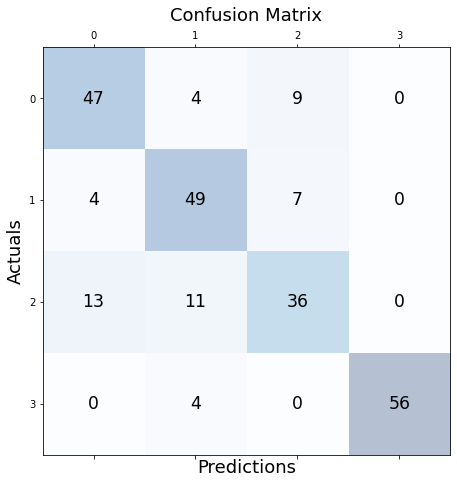

In [ ]:
# fig, ax = plt.subplots(figsize=(7.5, 7.5))
# ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
# for i in range(conf_matrix.shape[0]):
#     for j in range(conf_matrix.shape[1]):
#         ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
# plt.xlabel('Predictions', fontsize=18)
# plt.ylabel('Actuals', fontsize=18)
# plt.title('Confusion Matrix', fontsize=18)
# plt.show()

In [ ]:
#batik = ['Liong', 'Jlamprang', 'Terang bulan', 'Tujuh Rupa']

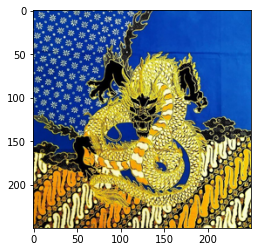

In [ ]:
#plt.imshow(X_test[15])

In [ ]:
#print("true label: ", batik[Y_true[15]])

true label:  Liong


In [ ]:
#print("predicted label: ", batik[Y_pred[15]])

predicted label:  Liong


In [ ]:
model_flip = ResNet18(4)
model_flip.build(input_shape = (None,250,250,3))
#use categorical_crossentropy since the label is one-hot encoded
#from keras.optimizers import SGD
# opt = SGD(learning_rate=0.1,momentum=0.9,decay = 1e-04) #parameters suggested by He [1]
model_flip.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.001),loss='categorical_crossentropy', metrics=["accuracy"]) 
model_flip.summary()

Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "res_net18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  9472      
                                                                 
 batch_normalization (BatchN  multiple                 256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
 resnet_block (ResnetBlock)  multiple          

In [ ]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPU


In [ ]:
es = EarlyStopping(patience= 6, restore_best_weights=True, monitor="val_accuracy")
history_flip = model_flip.fit(X_flip_train, Y_flip_train, batch_size = 32, epochs=50, steps_per_epoch=np.float32(len(X_flip_train)/32), validation_data=(X_flip_test, Y_flip_test), callbacks=[es])

Epoch 1/50
96/96 [==============================] - 28s 159ms/step - loss: 1.3582 - accuracy: 0.3278 - val_loss: 1.3636 - val_accuracy: 0.3458
Epoch 2/50
96/96 [==============================] - 14s 150ms/step - loss: 1.2631 - accuracy: 0.4160 - val_loss: 1.3754 - val_accuracy: 0.3125
Epoch 3/50
96/96 [==============================] - 14s 144ms/step - loss: 1.2060 - accuracy: 0.4697 - val_loss: 1.3015 - val_accuracy: 0.3938
Epoch 4/50
96/96 [==============================] - 14s 148ms/step - loss: 1.1649 - accuracy: 0.4896 - val_loss: 1.2372 - val_accuracy: 0.4521
Epoch 5/50
96/96 [==============================] - 13s 140ms/step - loss: 1.1247 - accuracy: 0.5267 - val_loss: 1.1754 - val_accuracy: 0.5271
Epoch 6/50
96/96 [==============================] - 13s 140ms/step - loss: 1.0963 - accuracy: 0.5339 - val_loss: 1.1404 - val_accuracy: 0.5521
Epoch 7/50
96/96 [==============================] - 13s 140ms/step - loss: 1.0541 - accuracy: 0.5752 - val_loss: 1.1221 - val_accuracy: 0.5521

In [ ]:
Y_flip_pred = []
for i in range(len(X_flip_test)):
  Y_flip_pred.append(model_flip.predict(X_flip_test[i:i+1]).tolist()[0])

In [ ]:
test_flip_class = np.argmax(Y_flip_test, axis=1)
Y_flip_true = test_flip_class.tolist()
pred_flip_class = np.argmax(Y_flip_pred, axis=1)
Y_flip_pred = pred_flip_class.tolist()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
batik = ['Liong', 'Jlamprang', 'Terang bulan', 'Tujuh Rupa']
accuracy_score(y_true=Y_flip_true, y_pred=Y_flip_pred)

0.825

In [ ]:
conf_flip_matrix = confusion_matrix(y_true=Y_flip_true, y_pred=Y_flip_pred)

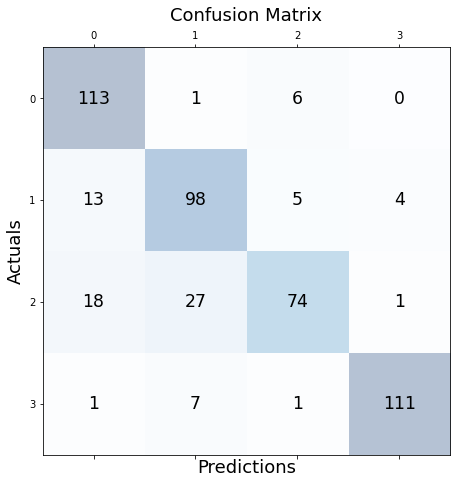

In [ ]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_flip_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_flip_matrix.shape[0]):
    for j in range(conf_flip_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_flip_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

true label:  Liong
predicted label:  Liong


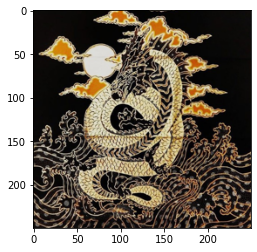

In [ ]:
batik = ['Liong', 'Jlamprang', 'Terang bulan', 'Tujuh Rupa']
plt.imshow(X_flip_test[85])
print("true label: ", batik[Y_flip_true[85]])
print("predicted label: ", batik[Y_flip_pred[85]])